<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Matin Mirzababaei

**Student ID**: 400102114



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [1]:
## Import necessary libraries here ##

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

from sklearn.linear_model import RidgeCV, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, Lasso

C:\Users\Matin\AppData\Local\Temp\ipykernel_30340\4117886295.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [2]:
## Write your code here ##

boston_df = pd.read_csv("boston.csv")

print(boston_df.head())

# Display information about the dataset
print(boston_df.info())

print("Shape of the dataset:", boston_df.shape)


      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-nu

**Boston Dataset Overview**

- **Origin:** The Boston housing dataset originates naturally.
  
- **Intended Use:** This dataset is suitable for assessment purposes.
  
- **Number of Cases:** It comprises a total of 506 cases.
  
- **Case Order:** The sequence of cases is undisclosed.
  
- **Attributes:** Each case in the dataset includes 14 attributes, which are as follows:

  1. CRIM: The per capita crime rate by town.
  2. ZN: The proportion of residential land zoned for lots over 25,000 sq. ft.
  3. INDUS: The proportion of non-retail business acres per town.
  4. CHAS: A dummy variable indicating whether the tract bounds the Charles River (1 if yes, 0 otherwise).
  5. NOX: The concentration of nitric oxides (parts per 10 million).
  6. RM: The average number of rooms per dwelling.
  7. AGE: The proportion of owner-occupied units built prior to 1940.
  8. DIS: Weighted distances to five Boston employment centers.
  9. RAD: An index of accessibility to radial highways.
  10. TAX: The full-value property-tax rate per $10,000.
  11. PTRATIO: The pupil-teacher ratio by town.
  12. B: A calculated attribute based on the proportion of blacks by town.
  13. LSTAT: The percentage of the lower status of the population.
  14. MEDV: The median value of owner-occupied homes in $1000s.

**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [3]:
## Write your code here ##

X = boston_df.drop(columns=['MEDV']) # features (X)
y = boston_df['MEDV'] # target variable (y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # (80% train, 20% test)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# R^2 and RMSE for train set
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# R^2 and RMSE for test set
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})


print("Training set:")
print("R^2:", r2_train)
print("RMSE:", rmse_train)
print("\nTesting set:")
print("R^2:", r2_test)
print("RMSE:", rmse_test)
print("\nCoefficients:")
print(coefficients)


Training set:
R^2: 0.7508856358979672
RMSE: 4.6520331848801675

Testing set:
R^2: 0.6687594935356316
RMSE: 4.9286021826653394

Coefficients:
    Feature  Coefficient
0      CRIM    -0.113056
1        ZN     0.030110
2     INDUS     0.040381
3      CHAS     2.784438
4        NX   -17.202633
5        RM     4.438835
6       AGE    -0.006296
7       DIS    -1.447865
8       RAD     0.262430
9       TAX    -0.010647
10  PTRATIO    -0.915456
11        B     0.012351
12    LSTAT    -0.508571


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10**np.linspace (3,-3,100) *0.5$$

In [4]:
## Write your code here ##

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = 10**np.linspace(3, -3, 100) * 0.5

# Note!!
# Train Ridge regression with **cross-validation**

ridge_model = RidgeCV(alphas=alphas, cv=5)
ridge_model.fit(X_train_scaled, y_train)

# alpha value
best_alpha = ridge_model.alpha_

y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)

# R^2 and RMSE for training set
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))

# R^2 and RMSE for testing set
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

print("Training set (Ridge Regression):")
print("Best Alpha:", best_alpha)
print("R^2:", r2_train_ridge)
print("RMSE:", rmse_train_ridge)
print("\nTesting set (Ridge Regression):")
print("Best Alpha:", best_alpha)
print("R^2:", r2_test_ridge)
print("RMSE:", rmse_test_ridge)


Training set (Ridge Regression):
Best Alpha: 2.8611838296751073
R^2: 0.750771062450331
RMSE: 4.653102850637557

Testing set (Ridge Regression):
Best Alpha: 2.8611838296751073
R^2: 0.6679125301377368
RMSE: 4.934899239613662


 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

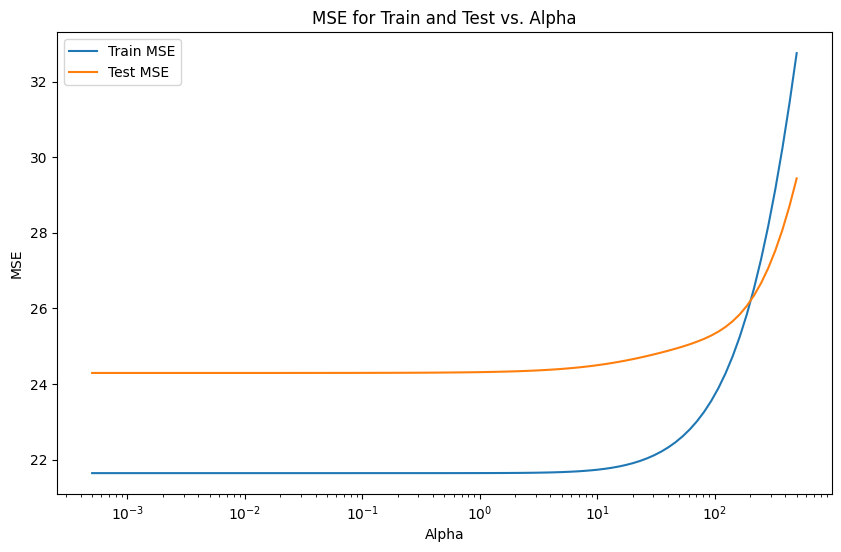

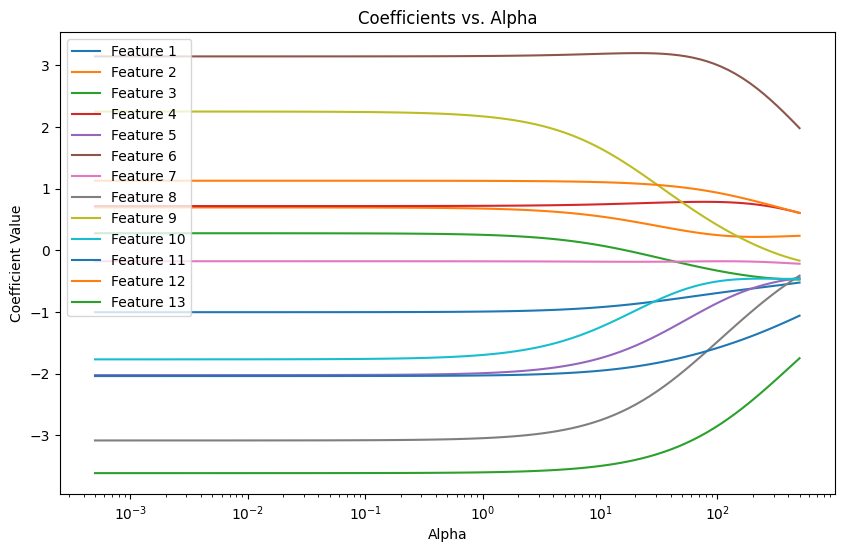

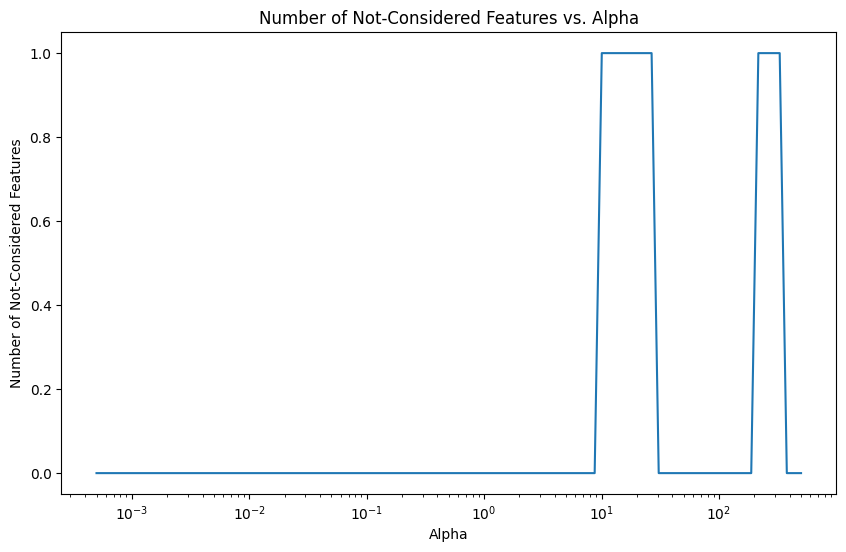

Ridge Regression with Optimal Alpha:
Optimal Alpha: 0.0005
Training set R^2: 0.7508856358939
Testing set R^2: 0.6687593453040712
Training set MSE: 21.641412753579647
Testing set MSE: 24.291130345354652
Coefficients:
[-1.00213022  0.69625906  0.27805144  0.71874035 -2.02230338  3.14524289
 -0.17604853 -3.08188888  2.25136614 -1.76697653 -2.03774647  1.12956712
 -3.61165199]

Linear Regression:
Training set R^2: 0.7508856358979672
Testing set R^2: 0.6687594935356316
Training set MSE: 21.641412753226316
Testing set MSE: 24.29111947497355
Coefficients:
[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]


In [5]:
import matplotlib.pyplot as plt

def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

#threshold for not-considered features
threshold = 0.1

mse_train_values = []
mse_test_values = []
coefficients_values = []
not_considered_features = []


for alpha in alphas:
    # Train Ridge regression
    ridge_model = RidgeCV(alphas=[alpha], cv=5)
    ridge_model.fit(X_train_scaled, y_train)

    y_train_pred_ridge = ridge_model.predict(X_train_scaled)
    y_test_pred_ridge = ridge_model.predict(X_test_scaled)

    # MSE for training and testing sets
    mse_train = calculate_mse(y_train, y_train_pred_ridge)
    mse_test = calculate_mse(y_test, y_test_pred_ridge)

    # MSE values
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

    # Store coefficients
    coefficients_values.append(ridge_model.coef_)

    # Count not-considered features
    not_considered = sum(abs(ridge_model.coef_) < threshold)
    not_considered_features.append(not_considered)

# Plot MSE 
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_train_values, label='Train MSE')
plt.plot(alphas, mse_test_values, label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test vs. Alpha')
plt.xscale('log')
plt.legend()
plt.show()

# Plot coefficients
plt.figure(figsize=(10, 6))
for i, coef in enumerate(np.array(coefficients_values).T):
    plt.plot(alphas, coef, label=f'Feature {i+1}')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients vs. Alpha')
plt.xscale('log')
plt.legend()
plt.show()

# Plot number of not-considered features
plt.figure(figsize=(10, 6))
plt.plot(alphas, not_considered_features)
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features vs. Alpha')
plt.xscale('log')
plt.show()

optimal_alpha_index = np.argmin(mse_test_values)
optimal_alpha = alphas[optimal_alpha_index]

ridge_model_optimal = RidgeCV(alphas=[optimal_alpha], cv=5)
ridge_model_optimal.fit(X_train_scaled, y_train)

y_train_pred_ridge_optimal = ridge_model_optimal.predict(X_train_scaled)
y_test_pred_ridge_optimal = ridge_model_optimal.predict(X_test_scaled)

r2_train_ridge_optimal = r2_score(y_train, y_train_pred_ridge_optimal)
r2_test_ridge_optimal = r2_score(y_test, y_test_pred_ridge_optimal)
mse_train_ridge_optimal = calculate_mse(y_train, y_train_pred_ridge_optimal)
mse_test_ridge_optimal = calculate_mse(y_test, y_test_pred_ridge_optimal)

print("Ridge Regression with Optimal Alpha:")
print("Optimal Alpha:", optimal_alpha)
print("Training set R^2:", r2_train_ridge_optimal)
print("Testing set R^2:", r2_test_ridge_optimal)
print("Training set MSE:", mse_train_ridge_optimal)
print("Testing set MSE:", mse_test_ridge_optimal)
print("Coefficients:")
print(ridge_model_optimal.coef_)


print("\nLinear Regression:")
print("Training set R^2:", r2_train)
print("Testing set R^2:", r2_test)
print("Training set MSE:", rmse_train**2)
print("Testing set MSE:", rmse_test**2)
print("Coefficients:")
print(model.coef_)


Without cross-validation (Using Ridge):

In [6]:

train_mse = []
test_mse = []
coefficients = []
not_considered_features = []

for alpha in alphas:
    model = Ridge(alpha=alpha) # Without Corss-Validation (CV)
    model.fit(X_train, y_train)

    # Calculate MSE for train and test sets
    train_mse.append(mean_squared_error(y_train, model.predict(X_train)))
    test_mse.append(mean_squared_error(y_test, model.predict(X_test)))

    # Store coefficients
    coefficients.append(model.coef_)

    not_considered_features.append(np.sum(np.abs(model.coef_) < threshold))

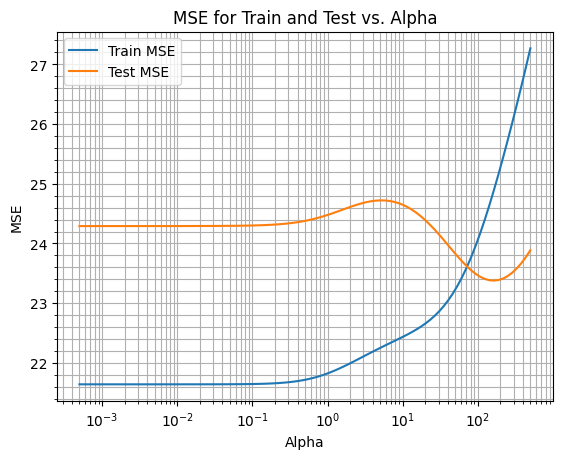

In [7]:
## Write your code here ##

plt.plot(alphas, train_mse, label='Train MSE')
plt.plot(alphas, test_mse, label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.xscale('log')
plt.title('MSE for Train and Test vs. Alpha')
plt.legend()
plt.grid(which='both')
plt.minorticks_on()

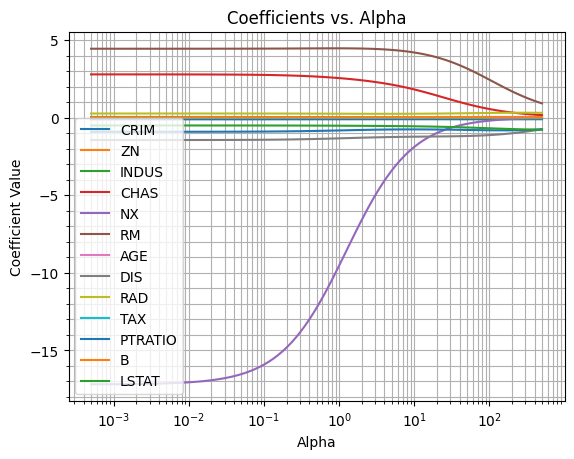

In [8]:
for i in range(np.shape(coefficients)[1]):
    coeff_i = []
    for j in range(np.shape(coefficients)[0]):
        coeff_i.append(coefficients[j][i])
    plt.plot(alphas, coeff_i,label=boston_df.columns[i])
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients vs. Alpha')
plt.xscale('log')
plt.legend()
plt.grid(which='both')
plt.minorticks_on()
plt.show()

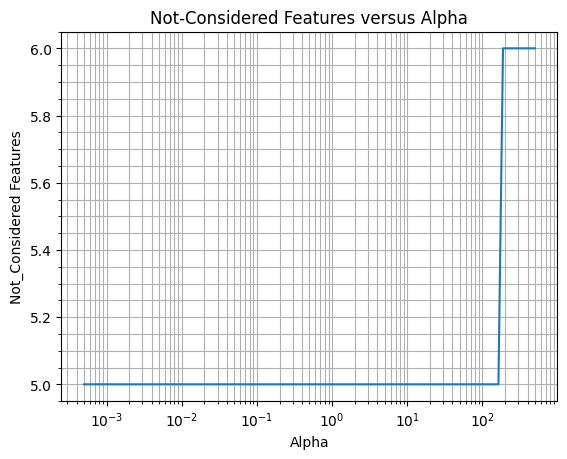

In [9]:
plt.plot(alphas, not_considered_features)
plt.xlabel('Alpha')
plt.ylabel('Not_Considered Features')
plt.title('Not-Considered Features versus Alpha')
plt.xscale('log')
plt.grid(which='both')
plt.minorticks_on()

**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

Lasso regression is advantageous for constructing models where sparsity is desirable, meaning only a few variables hold significant importance. This feature proves especially beneficial in scenarios characterized by a large number of predictor variables compared to observations, commonly referred to as the "large p, small n problem." By concurrently conducting variable selection and regression, lasso regression effectively addresses this issue, rendering it a potent technique for modeling in scenarios surpassing multiple linear regression.

Furthermore, lasso regression serves as a remedy for challenges like multicollinearity and overfitting within datasets. It achieves this by shrinking regression coefficients towards zero, effectively eliminating certain independent variables from the model. Consequently, this process enhances the interpretability of the model, setting it apart from alternative regularization methods such as ridge regression.

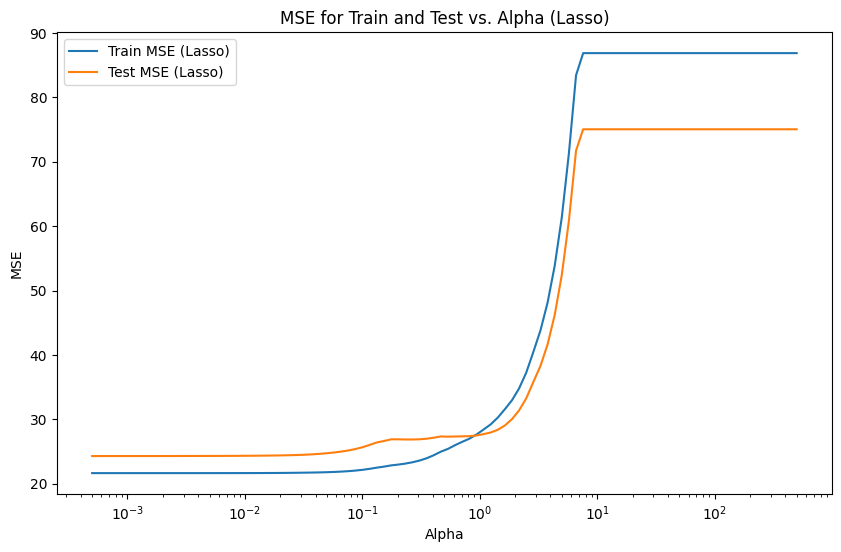

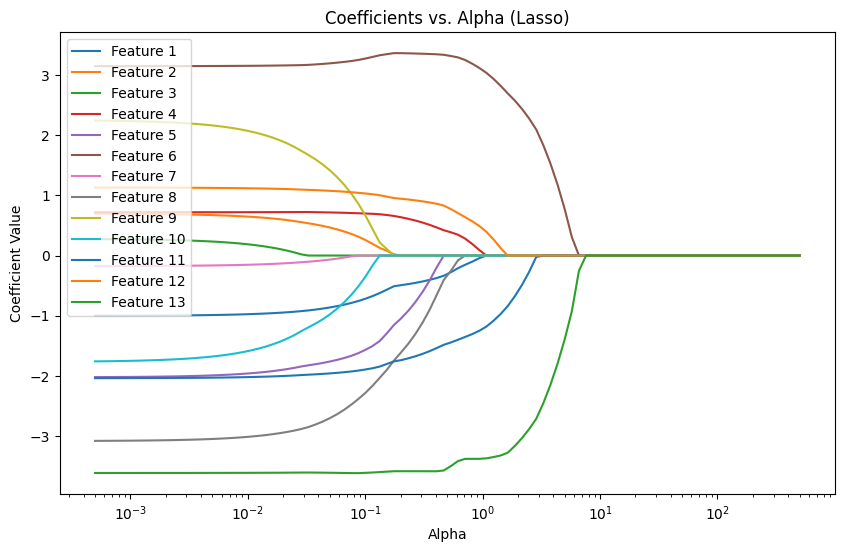

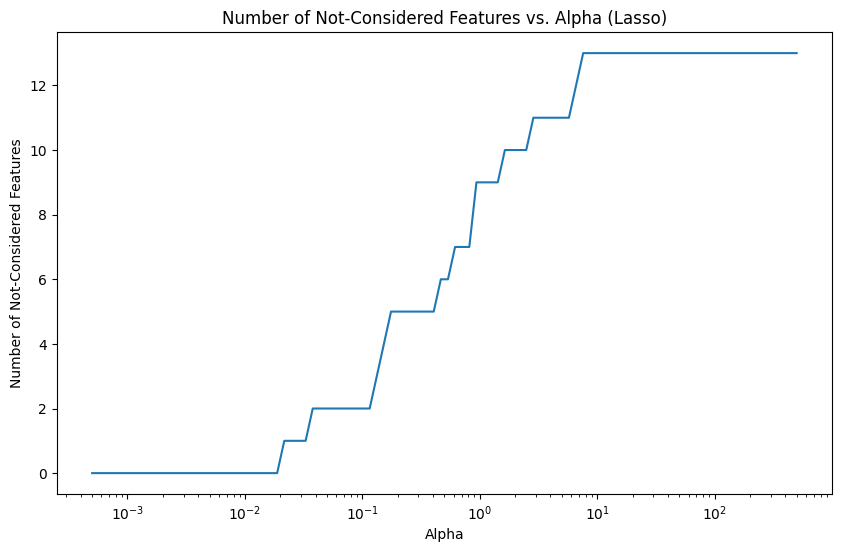

Lasso Regression with Optimal Alpha:
Optimal Alpha: 0.0005
Training set R^2: 0.7508854300361762
Testing set R^2: 0.6687362197737949
Training set MSE: 21.641430637140818
Testing set MSE: 24.292826227977404
Coefficients:
[-1.00074558  0.69377931  0.27350898  0.71880941 -2.01917501  3.14555767
 -0.17491699 -3.07840398  2.24237438 -1.75800663 -2.03682775  1.12897106
 -3.61152784]
Best value of penalization chosen by cross validation: 0.0005


In [10]:
## Write your code here ##

mse_train_values_lasso = []
mse_test_values_lasso = []
coefficients_values_lasso = []
not_considered_features_lasso = []

for alpha in alphas:

    lasso_model = LassoCV(alphas=[alpha], cv=5) # (With Cross-validation)
    lasso_model.fit(X_train_scaled, y_train)

    y_train_pred_lasso = lasso_model.predict(X_train_scaled)
    y_test_pred_lasso = lasso_model.predict(X_test_scaled)

    #  MSE for training and testing sets
    mse_train_lasso = calculate_mse(y_train, y_train_pred_lasso)
    mse_test_lasso = calculate_mse(y_test, y_test_pred_lasso)

    #  MSE values
    mse_train_values_lasso.append(mse_train_lasso)
    mse_test_values_lasso.append(mse_test_lasso)

    # Store coefficients
    coefficients_values_lasso.append(lasso_model.coef_)

    not_considered_lasso = sum(abs(lasso_model.coef_) < threshold)
    not_considered_features_lasso.append(not_considered_lasso)

plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_train_values_lasso, label='Train MSE (Lasso)')
plt.plot(alphas, mse_test_values_lasso, label='Test MSE (Lasso)')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test vs. Alpha (Lasso)')
plt.xscale('log')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for i, coef in enumerate(np.array(coefficients_values_lasso).T):
    plt.plot(alphas, coef, label=f'Feature {i+1}')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients vs. Alpha (Lasso)')
plt.xscale('log')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(alphas, not_considered_features_lasso)
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features vs. Alpha (Lasso)')
plt.xscale('log')
plt.show()

optimal_alpha_index_lasso = np.argmin(mse_test_values_lasso)
optimal_alpha_lasso = alphas[optimal_alpha_index_lasso]

lasso_model_optimal = LassoCV(alphas=[optimal_alpha_lasso], cv=5)
lasso_model_optimal.fit(X_train_scaled, y_train)

y_train_pred_lasso_optimal = lasso_model_optimal.predict(X_train_scaled)
y_test_pred_lasso_optimal = lasso_model_optimal.predict(X_test_scaled)

# R^2 and MSE for training and testing sets with the optimal alpha for Lasso regression
r2_train_lasso_optimal = r2_score(y_train, y_train_pred_lasso_optimal)
r2_test_lasso_optimal = r2_score(y_test, y_test_pred_lasso_optimal)
mse_train_lasso_optimal = calculate_mse(y_train, y_train_pred_lasso_optimal)
mse_test_lasso_optimal = calculate_mse(y_test, y_test_pred_lasso_optimal)

print("Lasso Regression with Optimal Alpha:")
print("Optimal Alpha:", optimal_alpha_lasso)
print("Training set R^2:", r2_train_lasso_optimal)
print("Testing set R^2:", r2_test_lasso_optimal)
print("Training set MSE:", mse_train_lasso_optimal)
print("Testing set MSE:", mse_test_lasso_optimal)
print("Coefficients:")
print(lasso_model_optimal.coef_)
print("Best value of penalization chosen by cross validation:", lasso_model.alpha_)

Without using Cross-Validation:

In [11]:
## Write your code here ##
train_mse = []
test_mse = []
coefficients = []
not_considered_features = []

# Train Ridge Regression models for each alpha
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)

    # Calculate MSE for train and test sets
    train_mse.append(mean_squared_error(y_train, model.predict(X_train)))
    test_mse.append(mean_squared_error(y_test, model.predict(X_test)))

    # Store coefficients
    coefficients.append(model.coef_)

    # Count number of not-considered features (features with coefficient close to zero)
    not_considered_features.append(np.sum(np.abs(model.coef_) < threshold))
    

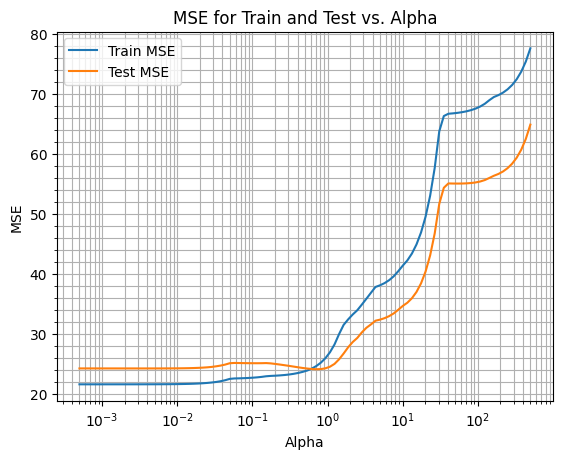

In [12]:
## Write your code here ##
plt.plot(alphas, train_mse, label='Train MSE')
plt.plot(alphas, test_mse, label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.xscale('log')
plt.title('MSE for Train and Test vs. Alpha')
plt.legend()
plt.grid(which='both')
plt.minorticks_on()

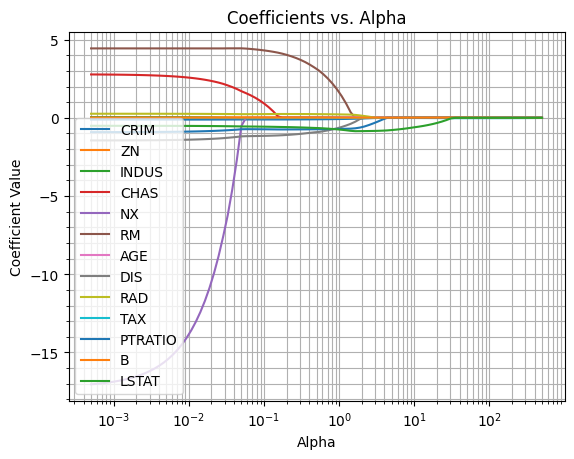

In [13]:
for i in range(np.shape(coefficients)[1]):
    coeff_i = []
    for j in range(np.shape(coefficients)[0]):
        coeff_i.append(coefficients[j][i])
    plt.plot(alphas, coeff_i,label=boston_df.columns[i])
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('Coefficient Value')
plt.title('Coefficients vs. Alpha')
plt.legend()
plt.grid(which='both')
plt.minorticks_on()
plt.show()

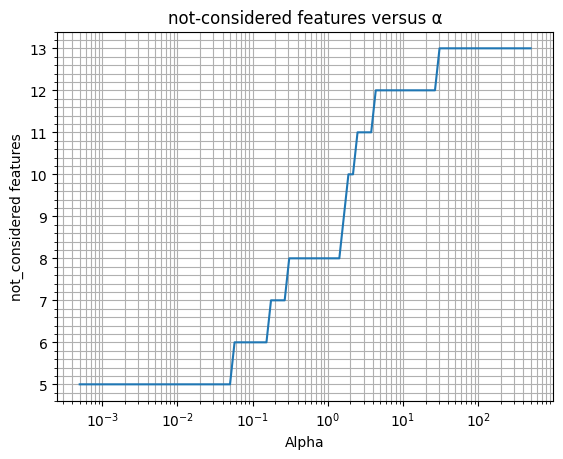

In [14]:
plt.plot(alphas, not_considered_features)
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('not_considered features')
plt.title('not-considered features versus α')
plt.grid(which='both')
plt.minorticks_on()

In [15]:
# Lasso with 5-fold cross-validation
lasso_cv = LassoCV(alphas=None, cv=5)

# Fit model
lasso_cv.fit(X_train, y_train)

print("Best value of penalization chosen by cross validation:", lasso_cv.alpha_)

Best value of penalization chosen by cross validation: 0.7112607795804332


**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

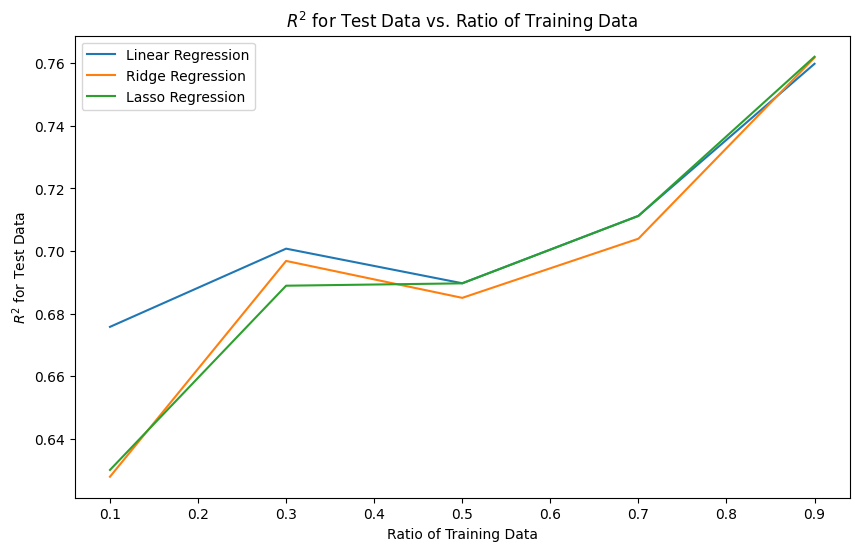

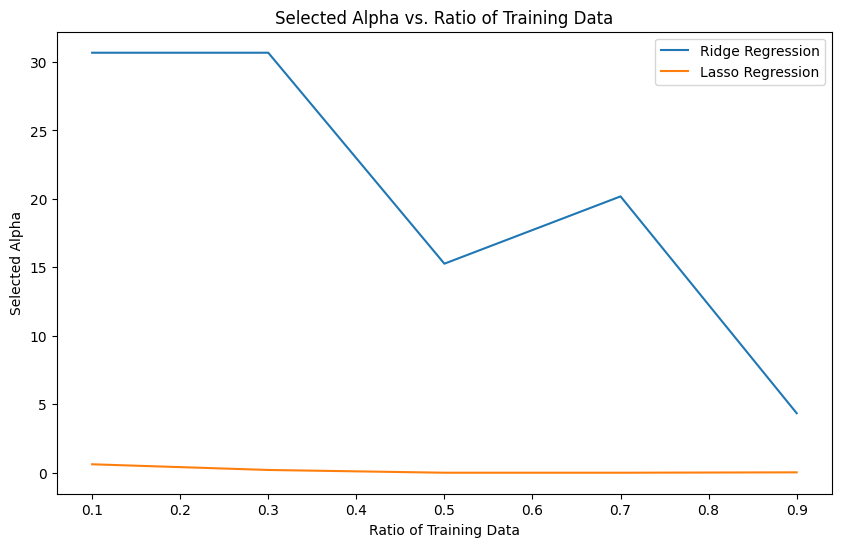

In [16]:
## Write you code here ##

ratios = [0.1, 0.3, 0.5, 0.7, 0.9]  
r2_values_lr = []
r2_values_ridge = []
r2_values_lasso = []
selected_alphas_ridge = []
selected_alphas_lasso = []

for ratio in ratios:
    # Split the data into training and testing sets with the current ratio
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-ratio, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Linear regression
    model_lr = LinearRegression()
    model_lr.fit(X_train_scaled, y_train)
    r2_values_lr.append(r2_score(y_test, model_lr.predict(X_test_scaled)))

    # Ridge regression
    ridge_model = RidgeCV(alphas=alphas, cv=5)
    ridge_model.fit(X_train_scaled, y_train)
    r2_values_ridge.append(r2_score(y_test, ridge_model.predict(X_test_scaled)))
    selected_alphas_ridge.append(ridge_model.alpha_)

    # Lasso regression
    lasso_model = LassoCV(alphas=alphas, cv=5)
    lasso_model.fit(X_train_scaled, y_train)
    r2_values_lasso.append(r2_score(y_test, lasso_model.predict(X_test_scaled)))
    selected_alphas_lasso.append(lasso_model.alpha_)

plt.figure(figsize=(10, 6))
plt.plot(ratios, r2_values_lr, label='Linear Regression')
plt.plot(ratios, r2_values_ridge, label='Ridge Regression')
plt.plot(ratios, r2_values_lasso, label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('$R^2$ for Test Data')
plt.title('$R^2$ for Test Data vs. Ratio of Training Data')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(ratios, selected_alphas_ridge, label='Ridge Regression')
plt.plot(ratios, selected_alphas_lasso, label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('Selected Alpha')
plt.title('Selected Alpha vs. Ratio of Training Data')
plt.legend()
plt.show()


1- R^2 for Test Data vs. Ratio of Training Data: As the ratio of training data increases, the R^2 value for test data generally increases for all three methods. However, linear regression tends to overfit more as the ratio of training data increases compared to ridge and lasso regression. Ridge and lasso regression show more stable performance in preventing overfitting as the training data ratio increases.

2- Selected Alpha vs. Ratio of Training Data: The selected alpha values for both ridge and lasso regression tend to decrease as the ratio of training data increases. This indicates that less regularization is needed as more training data becomes available. Additionally, the selected alpha values for ridge regression are generally higher than those for lasso regression, which suggests that ridge regression tends to require stronger regularization compared to lasso regression to prevent overfitting.